# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [108]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [109]:
# Your code here
df=pd.read_csv('ames.csv', index_col=0)


The following code checks that you loaded the data correctly:

In [110]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [111]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [112]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

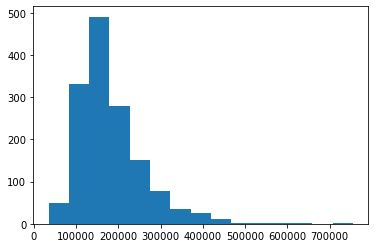

In [113]:
# Your code here
import numpy as np
plt.hist(df['SalePrice'],bins=15)
plt.show()



Now, print out the mean, median, and standard deviation:

In [114]:
# Your code here
mean_1=df['SalePrice'].mean()
med=df['SalePrice'].median()
sd=df['SalePrice'].std()

print(f'Mean:{mean_1},',f'Median:{med},',f'sdandard deviation:{sd}')

Mean:180921.19589041095, Median:163000.0, sdandard deviation:79442.50288288662


In the cell below, interpret the above information.

In [115]:
# Replace None with appropriate text
"""
The Average SalePrice is 180,921.195 units
The Median SalePrice is 163,000.0 unit i.e. the middle value in my df dataset
The standard deviation is 7944.502 units which indicates the amount of variation or dispersion from the average/mean saleprice
"""

'\nThe Average SalePrice is 180,921.195 units\nThe Median SalePrice is 163,000.0 unit i.e. the middle value in my df dataset\nThe standard deviation is 7944.502 units which indicates the amount of variation or dispersion from the average/mean saleprice\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

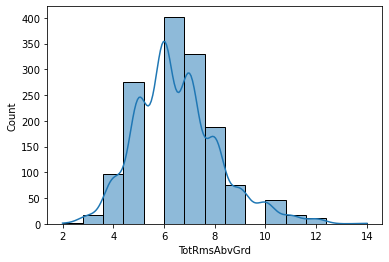

In [116]:
# Your code here
import seaborn as sns
#plt.hist(df['TotRmsAbvGrd'])
sns.histplot(df['TotRmsAbvGrd'], kde=True,bins=15)
plt.show()

Now, print out the mean, median, and standard deviation:

In [117]:
# Your code here
mean_1=df['TotRmsAbvGrd'].mean()
med=df['TotRmsAbvGrd'].median()
sd=df['TotRmsAbvGrd'].std()

print(f'Mean:{mean_1},',f'Median:{med},',f'sdandard deviation:{sd}')

Mean:6.517808219178082, Median:6.0, sdandard deviation:1.6253932905840505


In the cell below, interpret the above information.

In [118]:
# Replace None with appropriate text
"""
The Average Total rooms above Grade were  6.5
The Median Total rooms above grade was 6.0 unit i.e. the middle value in my df dataset
The standard deviation is 1.625 units which indicates the amount of variation or dispersion from the average/mean Total rooms grade
"""

'\nThe Average Total rooms above Grade were  6.5\nThe Median Total rooms above grade was 6.0 unit i.e. the middle value in my df dataset\nThe standard deviation is 1.625 units which indicates the amount of variation or dispersion from the average/mean Total rooms grade\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

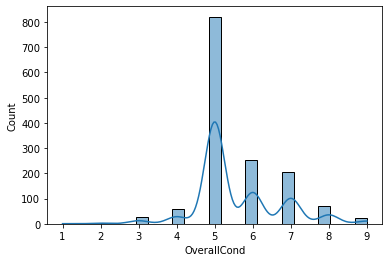

In [119]:
# Your code here
sns.histplot(df['OverallCond'], kde=True,bins=25)
plt.show()

Now, print out the mean, median, and standard deviation:

In [120]:
# Your code here
mean_1=df['OverallCond'].mean()
med=df['OverallCond'].median()
sd=df['OverallCond'].std()

print(f'Mean:{mean_1},',f'Median:{med},',f'sdandard deviation:{sd}')

Mean:5.575342465753424, Median:5.0, sdandard deviation:1.1127993367127316


In the cell below, interpret the above information.

In [121]:
# Replace None with appropriate text
"""
The Average overall condition is 5.5 units
The Median overall condition value is 5.0 unit i.e. the middle value in my df dataset
The standard deviation is 1.11 units which indicates the amount of variation or dispersion from the average/mean overall condition
"""

'\nThe Average overall condition is 5.5 units\nThe Median overall condition value is 5.0 unit i.e. the middle value in my df dataset\nThe standard deviation is 1.11 units which indicates the amount of variation or dispersion from the average/mean overall condition\n'

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [123]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond']> 5]
#print (below_average_condition.shape[1],average_condition.shape[1], above_average_condition.shape[1])


The following code checks that you created the subsets correctly:

In [124]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

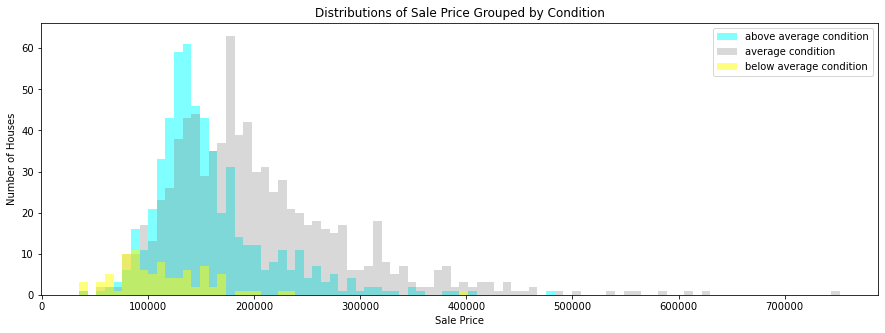

In [125]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [126]:
# Replace None with appropriate text
"""
None
"""

'\nNone\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [127]:
# Your code here
#Compute the correlation matrix
correlation_matrix = df.corr()

# Get the correlation values with 'SalePrice', excluding 'SalePrice' itself
correlations_with_saleprice = correlation_matrix['SalePrice'].drop('SalePrice')

# Find the column with the highest positive correlation
most_positive_corr_column = correlations_with_saleprice.idxmax()
most_positive_corr_value = correlations_with_saleprice.max()

# Print the results
print(f'Column most positively correlated with SalePrice: {most_positive_corr_column}')
print(f'Pearson correlation: {most_positive_corr_value}')

Column most positively correlated with SalePrice: OverallQual
Pearson correlation: 0.7909816005838047


Now, find the ***most negatively correlated*** column:

In [133]:
# Your code here
most_negative_corr_column = correlations_with_saleprice.idxmin()
print(f'most negatively correlated column is: {most_negative_corr_column}')

most negatively correlated column is: KitchenAbvGr


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

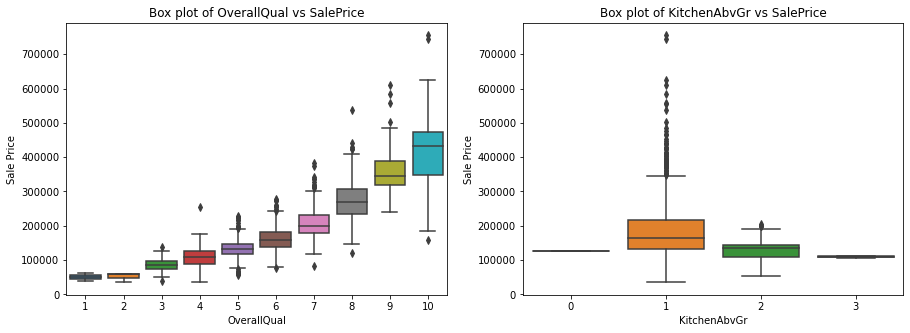

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming most_positive_corr_column and most_negative_corr_column are already defined
# as the names of the columns with the highest and lowest correlation with SalePrice

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_positive_corr_column],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_negative_corr_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f"Box plot of {most_positive_corr_column} vs SalePrice")
ax1.set_xlabel(most_positive_corr_column)
ax1.set_ylabel("Sale Price")
ax2.set_title(f"Box plot of {most_negative_corr_column} vs SalePrice")
ax2.set_xlabel(most_negative_corr_column)
ax2.set_ylabel("Sale Price")

plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [138]:
# Replace None with appropriate text
"""
1. Boxplot of most_positive_corr_column vs. SalePrice:
Understanding the Positive Correlation: The column with the highest positive correlation to SalePrice suggests that 
as the values in this column increase, SalePrice tends to increase as well.
Distribution:
Median Line: The horizontal line inside the box represents the median (50th percentile) of the SalePrice for each category or range of the most_positive_corr_column.
Interquartile Range (IQR): The box itself spans from the 25th percentile (Q1) to the 75th percentile (Q3), showing the spread of the middle 50% of the data. A larger box indicates more variability in SalePrice within that category.
Whiskers: The "whiskers" extend to 1.5 times the IQR from the quartiles, showing the range of typical values.
Outliers: Points beyond the whiskers are considered outliers. Outliers may indicate unusual SalePrice values for certain categories, possibly due to unique factors like premium features or location.
Interpretation:
Increasing Trend: If the median line rises across categories or ranges of the most_positive_corr_column, it reinforces the positive correlation. Higher values in this column are associated with higher SalePrice.
Category Insights: If the column is categorical, look at how different categories relate to SalePrice. Certain categories might be significantly more valuable, explaining the positive correlation.
2. Boxplot of most_negative_corr_column vs. SalePrice:
Understanding the Negative Correlation: The column with the most negative correlation to SalePrice indicates that as values in this column increase, SalePrice tends to decrease.
Distribution:
Median Line: Similar to the positive correlation boxplot, but in this case, you might see the median line descending as the values in most_negative_corr_column increase.
Interquartile Range (IQR): The spread of SalePrice within each category may differ, and the IQR provides insight into this variability.
Whiskers and Outliers: Outliers in this plot might suggest homes with unusual circumstances, such as an older home in a high-demand area.
Interpretation:
Decreasing Trend: A downward trend in the median line across categories suggests that higher values in this column are associated with lower SalePrice, reinforcing the negative correlation.
Category Insights: This boxplot might reveal which specific categories or ranges are particularly detrimental to SalePrice. For example, an older home age category might show a steep decline in median SalePrice.
Overall Insights:
Correlation Strength: The steepness of the median line's change across categories can give you a sense of the strength of the correlation. A steep slope (either positive or negative) indicates a stronger relationship between the column and SalePrice.
Variability and Outliers: High variability or the presence of many outliers may indicate that other factors influence SalePrice, suggesting that the relationship might not be purely linear.
By analyzing these boxplots, you can better understand how specific factors (represented by most_positive_corr_column and most_negative_corr_column) influence the sale price of homes in your dataset.
"""

'\n1. Boxplot of most_positive_corr_column vs. SalePrice:\nUnderstanding the Positive Correlation: The column with the highest positive correlation to SalePrice suggests that as the values in this column increase, SalePrice tends to increase as well.\nDistribution:\nMedian Line: The horizontal line inside the box represents the median (50th percentile) of the SalePrice for each category or range of the most_positive_corr_column.\nInterquartile Range (IQR): The box itself spans from the 25th percentile (Q1) to the 75th percentile (Q3), showing the spread of the middle 50% of the data. A larger box indicates more variability in SalePrice within that category.\nWhiskers: The "whiskers" extend to 1.5 times the IQR from the quartiles, showing the range of typical values.\nOutliers: Points beyond the whiskers are considered outliers. Outliers may indicate unusual SalePrice values for certain categories, possibly due to unique factors like premium features or location.\nInterpretation:\nIncre

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [139]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

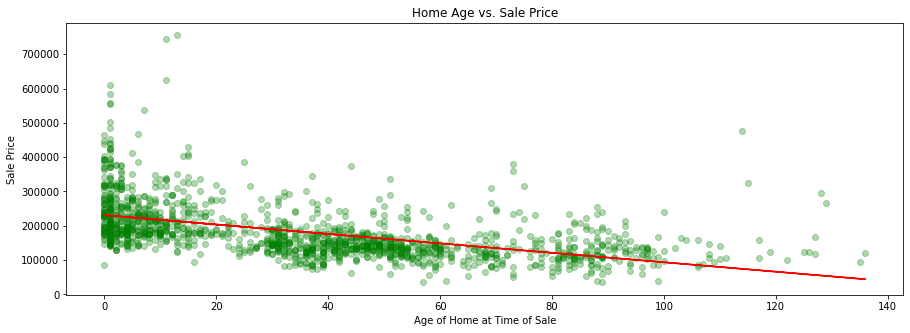

In [ ]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
There is a negative correlation between age of a home and sale price. In summary, the negative correlation in the scatter plot above suggests that, generally, as the age of a home increases, its sale price tends to decrease. This relationship reflects how market perceptions and the condition of older homes may influence their market value.
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.